<a href="https://colab.research.google.com/github/xoyeon/hongong-mldl/blob/main/03_1_%7C_k_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-최근접 이웃 회귀

알고리즘
- 분류
- 회귀 (regression) : 임의의 어떤 숫자를 예측하는 문제

k-최근접 이웃 알고리즘
1. 예측하려는 샘플에 가장 가까운 샘플 k개 선택
2. 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측   
=> 이웃 샘플의 수치를 사용하여 새로운 샘플의 타깃을 예측하는 방법은 "평균값" 활용

# 데이터 준비

In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

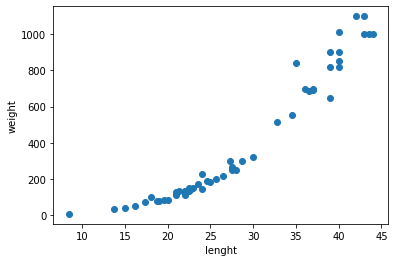

In [3]:
# 산점도 그리기
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('lenght')  # 특성
plt.ylabel('weight')  # 타깃
plt.show()

In [4]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [5]:
# sklearn에 사용하기 위해 2차원 배열로 만들기
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [6]:
test_array = test_array.reshape(2,2) # reshape() 메서드에서는 바꾸려는 배열의 크기를 지정할 수 있음
print(test_array.shape)

(2, 2)


In [7]:
# 배열의 크기를 자동으로 지정
train_input =  train_input.reshape(-1, 1)  # 크기에 -1을 지정하면 나머지 원소 개수로 모두 채움
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


# 결정계수(R2)

In [14]:
# 사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스는 KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [15]:
print(knr.score(test_input, test_target))

0.9928094061010639


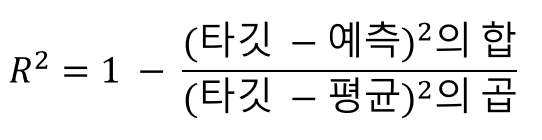

타깃의 평균 정도를 예측하는 수준이라면 R2 ~ 0   
예측이 타깃에 아주 가까워지면 ~ 1

In [16]:
# 어느 정도 예측이 벗어났는지 가늠해보자
from sklearn.metrics import mean_absolute_error  ## 타깃과 예측의 절댓값 오차를 평균하여 반환

# 테스트 세트에 대한 예측을 만듭니다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


# 과대적합 vs 과소적합

In [17]:
# 앞서 훈련한 모델을 사용해 훈련 세트의 R2 점수를 확인해보자
print(knr.score(train_input, train_target))

0.9698823289099255


In [19]:
# 과소적합이므로 모델을 조금 더 복잡하게 만들어보자

# 이웃을 개수를 3으로 설정합니다
knr.n_neighbors = 3  ## 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해진다
 
 # 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [20]:
print(knr.score(test_input, test_target))

0.974645996398761
